# Goal

* Run `phylosignal::phyloSignal` on alpha diversity metric values

# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/host_specific/phylosignal/host_TT/'

# phyloseq
physeq_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/phyloseq/physeq_r5k.RDS'

# host phylogeny
host_tree_SpecD_file = '/ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/TT/unified_metadata_complete_20180625_rn_16S-r5k_SpecD.nwk'

# alpha-div calculated with qiime2 & summarized
alpha_div_sum_file = '/ebio/abt3_projects/Georg_animal_feces/data/host_specific/phylosignal/host_TT//tip-data_alpha-div.tsv'

# alpha-div calculated with qiime2 & summarized & diet regressed out
alpha_div_sum_resid_file = '/ebio/abt3_projects/Georg_animal_feces/data/host_specific/phylosignal/host_TT//tip-data_alpha-div_diet-resid.tsv'

# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(ape)
library(phyloseq)
library(phytools)
source('/ebio/abt3_projects/Georg_animal_feces/code/init.R') 


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: maps


In [3]:
make_dir(work_dir)
setwd(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/host_specific/phylosignal/host_TT/ 


# Load

In [4]:
physeq = readRDS(physeq_file)
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 30290 taxa and 213 samples ]
sample_data() Sample Data:       [ 213 samples by 171 sample variables ]
tax_table()   Taxonomy Table:    [ 30290 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 30290 tips and 29752 internal nodes ]

In [5]:
# metadata
metadata = physeq %>% 
    sample_data %>% 
    as.matrix %>% 
    as.data.frame %>%
    mutate(scientific_name = gsub(' ', '_', scientific_name))

metadata %>% status

Warning message in class(X) <- NULL:
“Setting class(x) to NULL;   result will no longer be an S4 object”

[1] 213 171


X.SampleID,BarcodeSequence,LinkerPrimerSequence,Primer,ReversePrimer,Barcode_ID,sample_number,host_subject_id,host_german_name,host_common_name,⋯,wellplate_position_Illumina,Cornell_Dilution_DNA_Illumina,Num_Illumina,Num,sorting_454,comments_additional,DNA_box_20180622,sample_vol_20180622,sample_label_20180622,Description
X1.Eurasian.Beaver,ACTCACGGTATG,CATGCTGCCTCCCGTAGGAGT,GCCTCCCTCGCGCCATCAG,AGAGTTTGATCCTGGCTCAG,338R_BC0049,1,1,Biber,Eurasian.Beaver,⋯,B12,4,120,18,18,NA,1,20,1,NA
X101.Horse,ACGACGTCTTAG,CATGCTGCCTCCCGTAGGAGT,GCCTCCCTCGCGCCATCAG,AGAGTTTGATCCTGGCTCAG,338R_BC0030,101,101,Hauspferd,Horse,⋯,E8,16,344,160,160,NA,2,20,101,NA
X102.Kulan,ACGAGTGCTATC,CATGCTGCCTCCCGTAGGAGT,GCCTCCCTCGCGCCATCAG,AGAGTTTGATCCTGGCTCAG,338R_BC0031,102,102,Khulan,Kulan,⋯,E9,16,345,161,161,NA,2,20,102,NA


In [6]:
# host phylogeny
host_tree = read.tree(host_tree_SpecD_file)
host_tree


Phylogenetic tree with 128 tips and 127 internal nodes.

Tip labels:
	Sander_lucioperca, Esox_lucius, Salvelinus_fontinalis, Aspius_aspius, Leuciscus_idus, Blicca_bjoerkna, ...
Node labels:
	, @_22_@, @_8_@, @_7_@, @_20_@, @_17_@, ...

Rooted; includes branch lengths.

In [7]:
# load alpha-div summarized values
alpha_div = read.delim(alpha_div_sum_file, sep='\t')
alpha_div %>% status

[1] 128   5


scientific_name,faith_pd,observed_otus,pielou_e,shannon
Acrocephalus_scirpaceus,9.086015,73,0.5827143,3.606900
Aepyceros_melampus,27.445870,405,0.6344222,5.495224
Anas_platyrhynchos,9.912024,85,0.5629316,3.608049


In [8]:
# load alpha-div summarized values
alpha_div_resid = read.delim(alpha_div_sum_resid_file, sep='\t')
alpha_div_resid$scientific_name = rownames(alpha_div_resid)
alpha_div_resid %>% status

[1] 128   5


,faith_pd,shannon,observed_otus,pielou_e,scientific_name
Acrocephalus_scirpaceus,-0.1278358,-0.0630195,-0.1128694,-0.007470306,Acrocephalus_scirpaceus
Aepyceros_melampus,-0.4400226,-0.6996897,-0.1321044,-0.851251057,Aepyceros_melampus
Anas_platyrhynchos,-1.4000014,-0.9737452,-1.6272754,-0.626503702,Anas_platyrhynchos


## Creating traitgram

In [15]:
df = alpha_div

In [16]:
trait = df$faith_pd %>% as.character %>% as.vector %>% as.numeric
names(trait) = df$scientific_name %>% as.character %>% as.vector
trait %>% length %>% print
trait %>% summary

[1] 128


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.008   6.216  12.267  16.458  24.103  49.647 

Optimizing the positions of the tip labels...


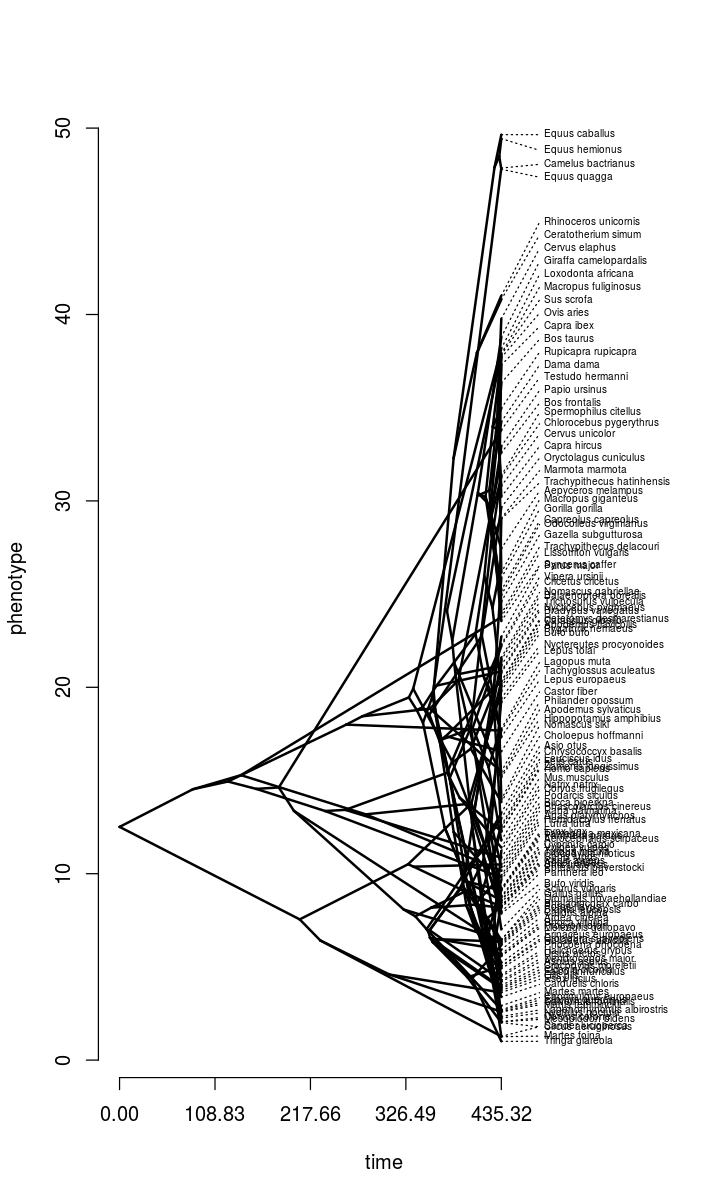

In [17]:
options(repr.plot.width=6, repr.plot.height=10)
phenogram(host_tree, trait, fsize=0.5)

# Contmap plot

## alpha div

In [18]:
df = alpha_div

### Faith's PD

In [19]:
trait = df$faith_pd %>% as.character %>% as.vector %>% as.numeric
names(trait) = df$scientific_name %>% as.character %>% as.vector
trait %>% length %>% print
trait %>% summary

[1] 128


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.008   6.216  12.267  16.458  24.103  49.647 

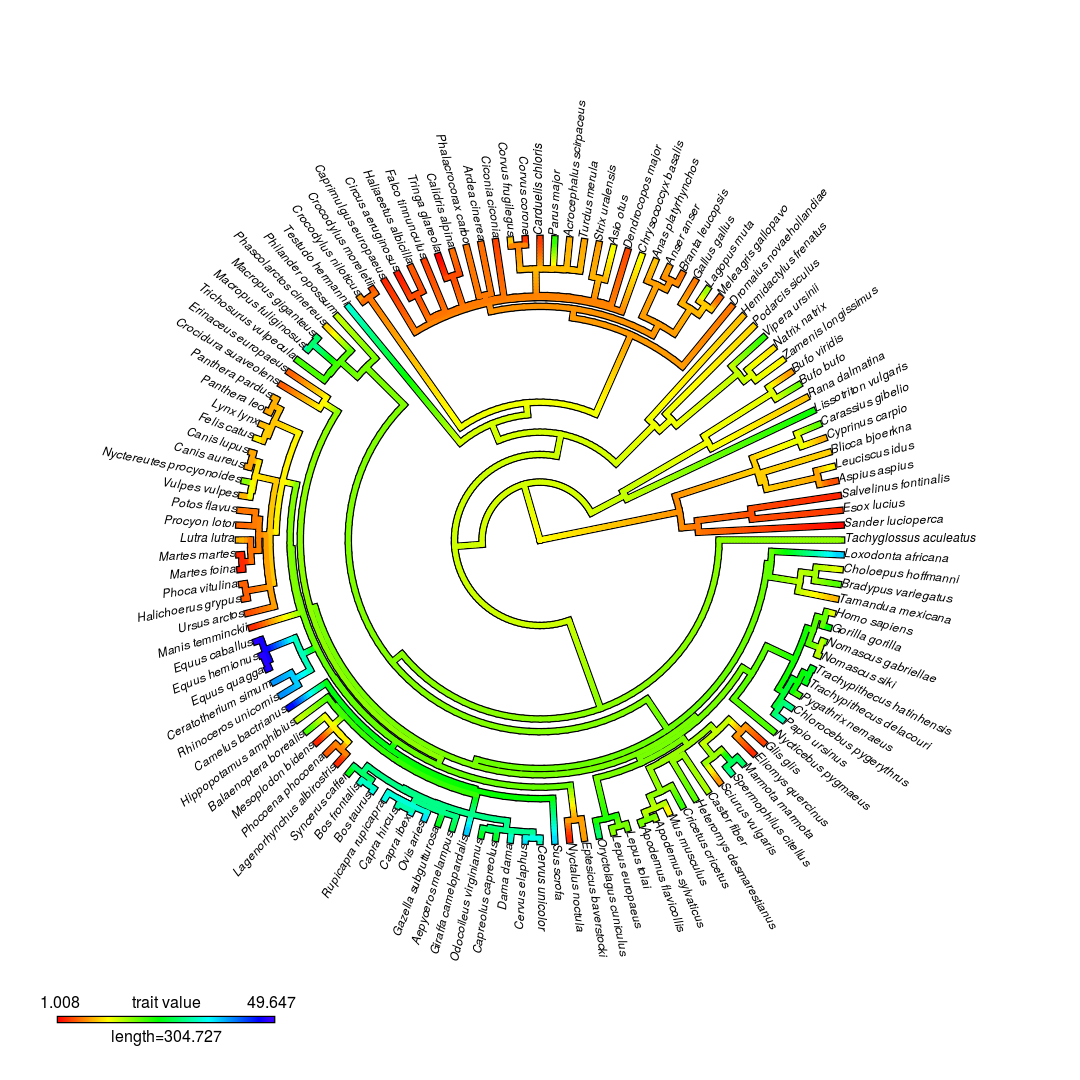

In [20]:
options(repr.plot.width=9, repr.plot.height=9)
obj = contMap(host_tree, trait, plot=FALSE)
plot(obj, type="fan", legend=0.7*max(nodeHeights(host_tree)), fsize=c(0.6,0.8))

In [21]:
out_file = file.path(work_dir, 'contMap_faithPD.pdf')
pdf(out_file, width=10, height=10)
obj = contMap(host_tree, trait, plot=FALSE)
plot(obj, type="fan", legend=0.7*max(nodeHeights(host_tree)), fsize=c(0.6,0.8))
dev.off()
cat('File written:', out_file, '\n')

png 
  2

File written: /ebio/abt3_projects/Georg_animal_feces/data/host_specific/phylosignal/host_TT//contMap_faithPD.pdf 


## Alpha div residuals

In [22]:
df = alpha_div_resid

### Faith's PD

In [23]:
trait = df$faith_pd %>% as.character %>% as.vector %>% as.numeric
names(trait) = df$scientific_name %>% as.character %>% as.vector
trait %>% length %>% print
trait %>% summary

[1] 128


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.4771 -0.5528 -0.1289  0.0000  0.5536  2.5861 

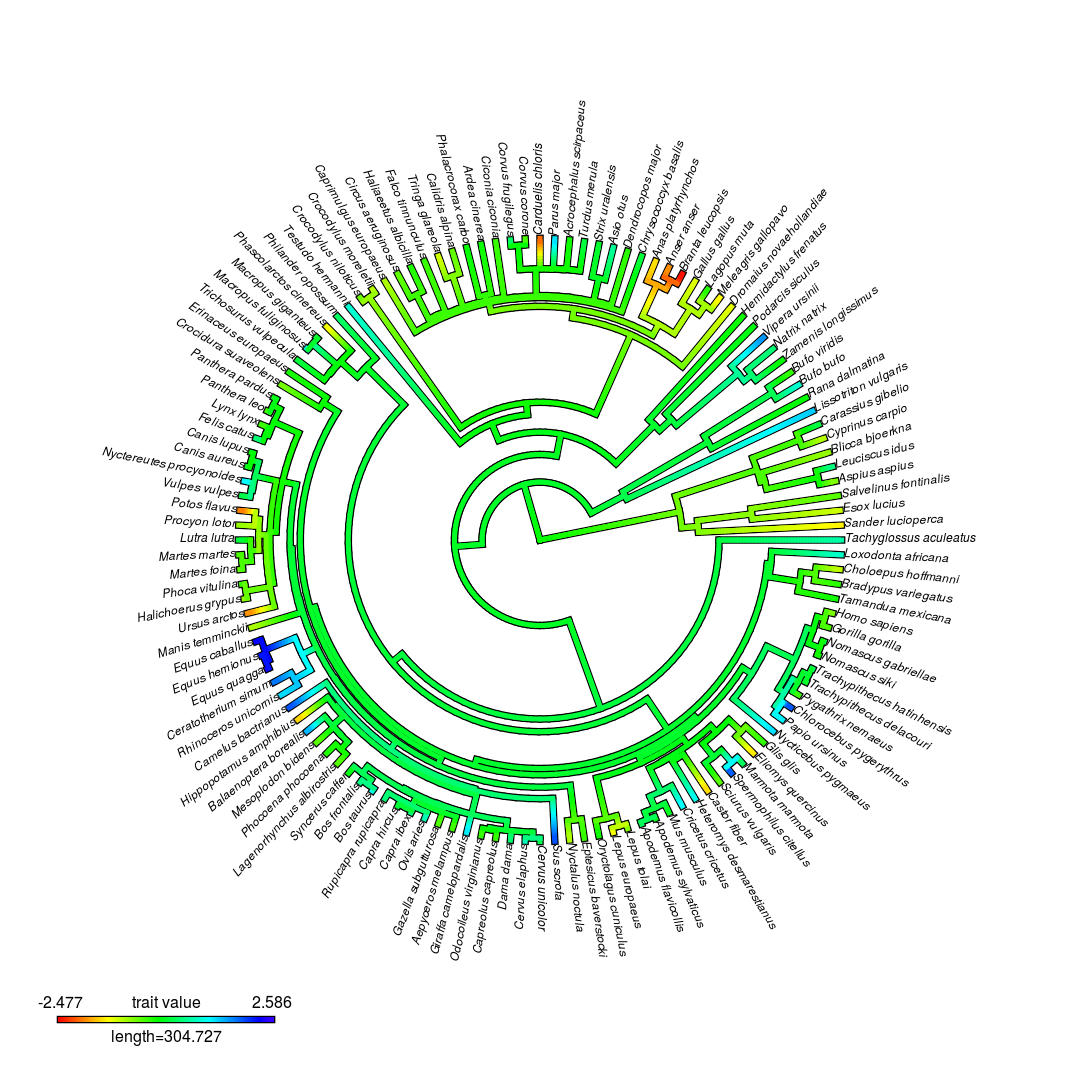

In [24]:
options(repr.plot.width=9, repr.plot.height=9)
obj = contMap(host_tree, trait, plot=FALSE)
plot(obj, type="fan", legend=0.7*max(nodeHeights(host_tree)), fsize=c(0.6,0.8))

In [25]:
out_file = file.path(work_dir, 'contMap_faithPD_diet-resids.pdf')
pdf(out_file, width=10, height=10)
obj = contMap(host_tree, trait, plot=FALSE)
plot(obj, type="fan", legend=0.7*max(nodeHeights(host_tree)), fsize=c(0.6,0.8))
dev.off()
cat('File written:', out_file, '\n')

png 
  2

File written: /ebio/abt3_projects/Georg_animal_feces/data/host_specific/phylosignal/host_TT//contMap_faithPD_diet-resids.pdf 


# sessionInfo

In [26]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 16.04.4 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3/envs/py3_physeq_phylo/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3/envs/py3_physeq_phylo/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2    phytools_0.6-44 maps_3.3.0      phyloseq_1.22.3
[5] ape_5.1         ggplot2_2.2.1   tidyr_0.8.1     dplyr_0.7.4    

loaded via a namespace (and not attached):
 [1] Biobase_2.38.0 